<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/Top1_0_33_(f1_score)_Image_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Credit: 300510-กนธี for the initial sheet tq.*

*Note: I modified it so that it skip GDrive mount part for the simplicity sake.*

-----

300510-กนธี

วิธีการรัน


---

** หากมีสิ่งใดแนะนำ สามารถบอกได้


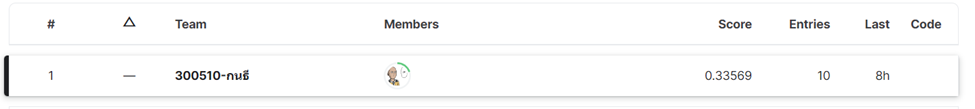
Hackathon link: https://www.kaggle.com/competitions/superai-hackathon-online-image-ner

### That high score is obtain by Ensemble Method of three Bert models


# **Mouth Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c superai-hackathon-online-image-ner #download competition dataset

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           4612        144  1.0              
mvieira101/global-cost-of-living                                Global Cost of Living                                 1MB  2022-12-03 16:37:53            539         29  0.9705882        
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25          21083        566  1.0              
thedevastator/jobs-dataset-from-glassdoor                   

Unzip file 

In [ ]:
!unzip /content/superai-hackathon-online-image-ner.zip

GPU Instance Checking


In [ ]:
!nvidia-smi

Sun Nov 20 00:24:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Install library 
*   Transformers (Huggingface)
*   Datasets (Huggingface)
*   pythainlp
*   simpletransformers
*   deskew
*   pytesseract







In [ ]:
!pip -q install transformers
!pip -q install datasets
!pip -q install pythainlp
!pip -q install simpletransformers
!pip -q install python-crfsuite
!pip -q install easyocr
!pip -q install pytesseract
!pip -q install deskew

     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 39.6 MB/s 
     |████████████████████████████████| 182 kB 64.9 MB/s 
     |████████████████████████████████| 451 kB 4.8 MB/s 
     |████████████████████████████████| 212 kB 66.2 MB/s 
     |████████████████████████████████| 132 kB 52.7 MB/s 
     |████████████████████████████████| 127 kB 56.9 MB/s 
     |████████████████████████████████| 9.6 MB 4.4 MB/s 
     |████████████████████████████████| 250 kB 5.2 MB/s 
     |████████████████████████████████| 9.2 MB 62.3 MB/s 
     |████████████████████████████████| 1.9 MB 65.7 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 1.3 MB 41.0 MB/s 
     |████████████████████████████████| 168 kB 61.7 MB/s 
     |████████████████████████████████| 182 kB 79.9 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 168 kB 57.9 MB/s 
     |████████████████

In [ ]:
!sudo apt-get install  tesseract-ocr libtesseract-dev tesseract-ocr-tha

In [ ]:
!pip3 install pytesseract

In [ ]:
import cv2
import PIL
from PIL import Image
from PIL import ImageDraw
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
import numpy as np
import seaborn as sns
import pandas as pd
import shutil

from tqdm import tqdm
from tqdm.notebook import trange, tqdm
import pytesseract
import re
import seaborn as sns
sns.set_theme()

### deskew 

In [ ]:
from deskew import determine_skew


# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = determine_skew(cvImage)
    return rotateImage(cvImage, angle)

Test deskew

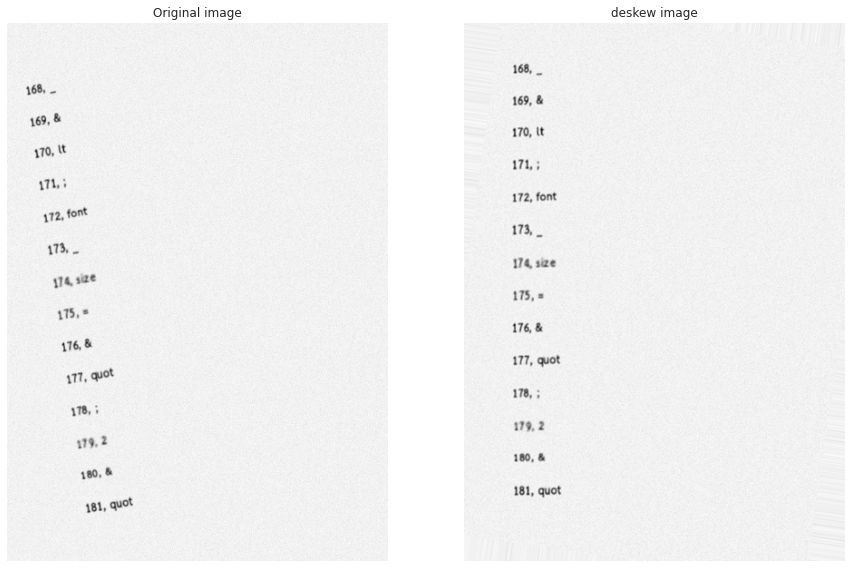

In [ ]:

local='/content/images/images/00012.jpg'
img = cv2.imread(local,0)
fixed = deskew(img)



plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1,2,1)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.imshow(img)
ax1.axis('off')
plt.title("Original image")


ax2 = plt.subplot(1,2,2)
fixed =cv2.cvtColor(fixed , cv2.COLOR_BGR2RGB)
ax2.imshow(fixed)
ax2.axis('off')
plt.title("deskew image")

plt.show()

### Preprocess

15


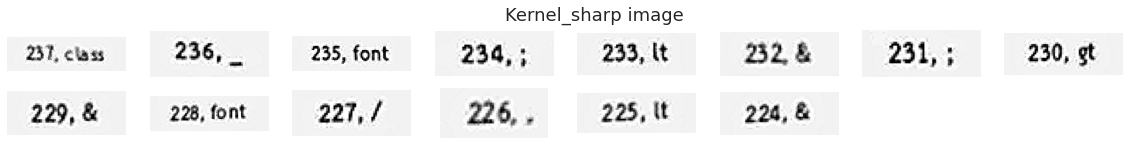

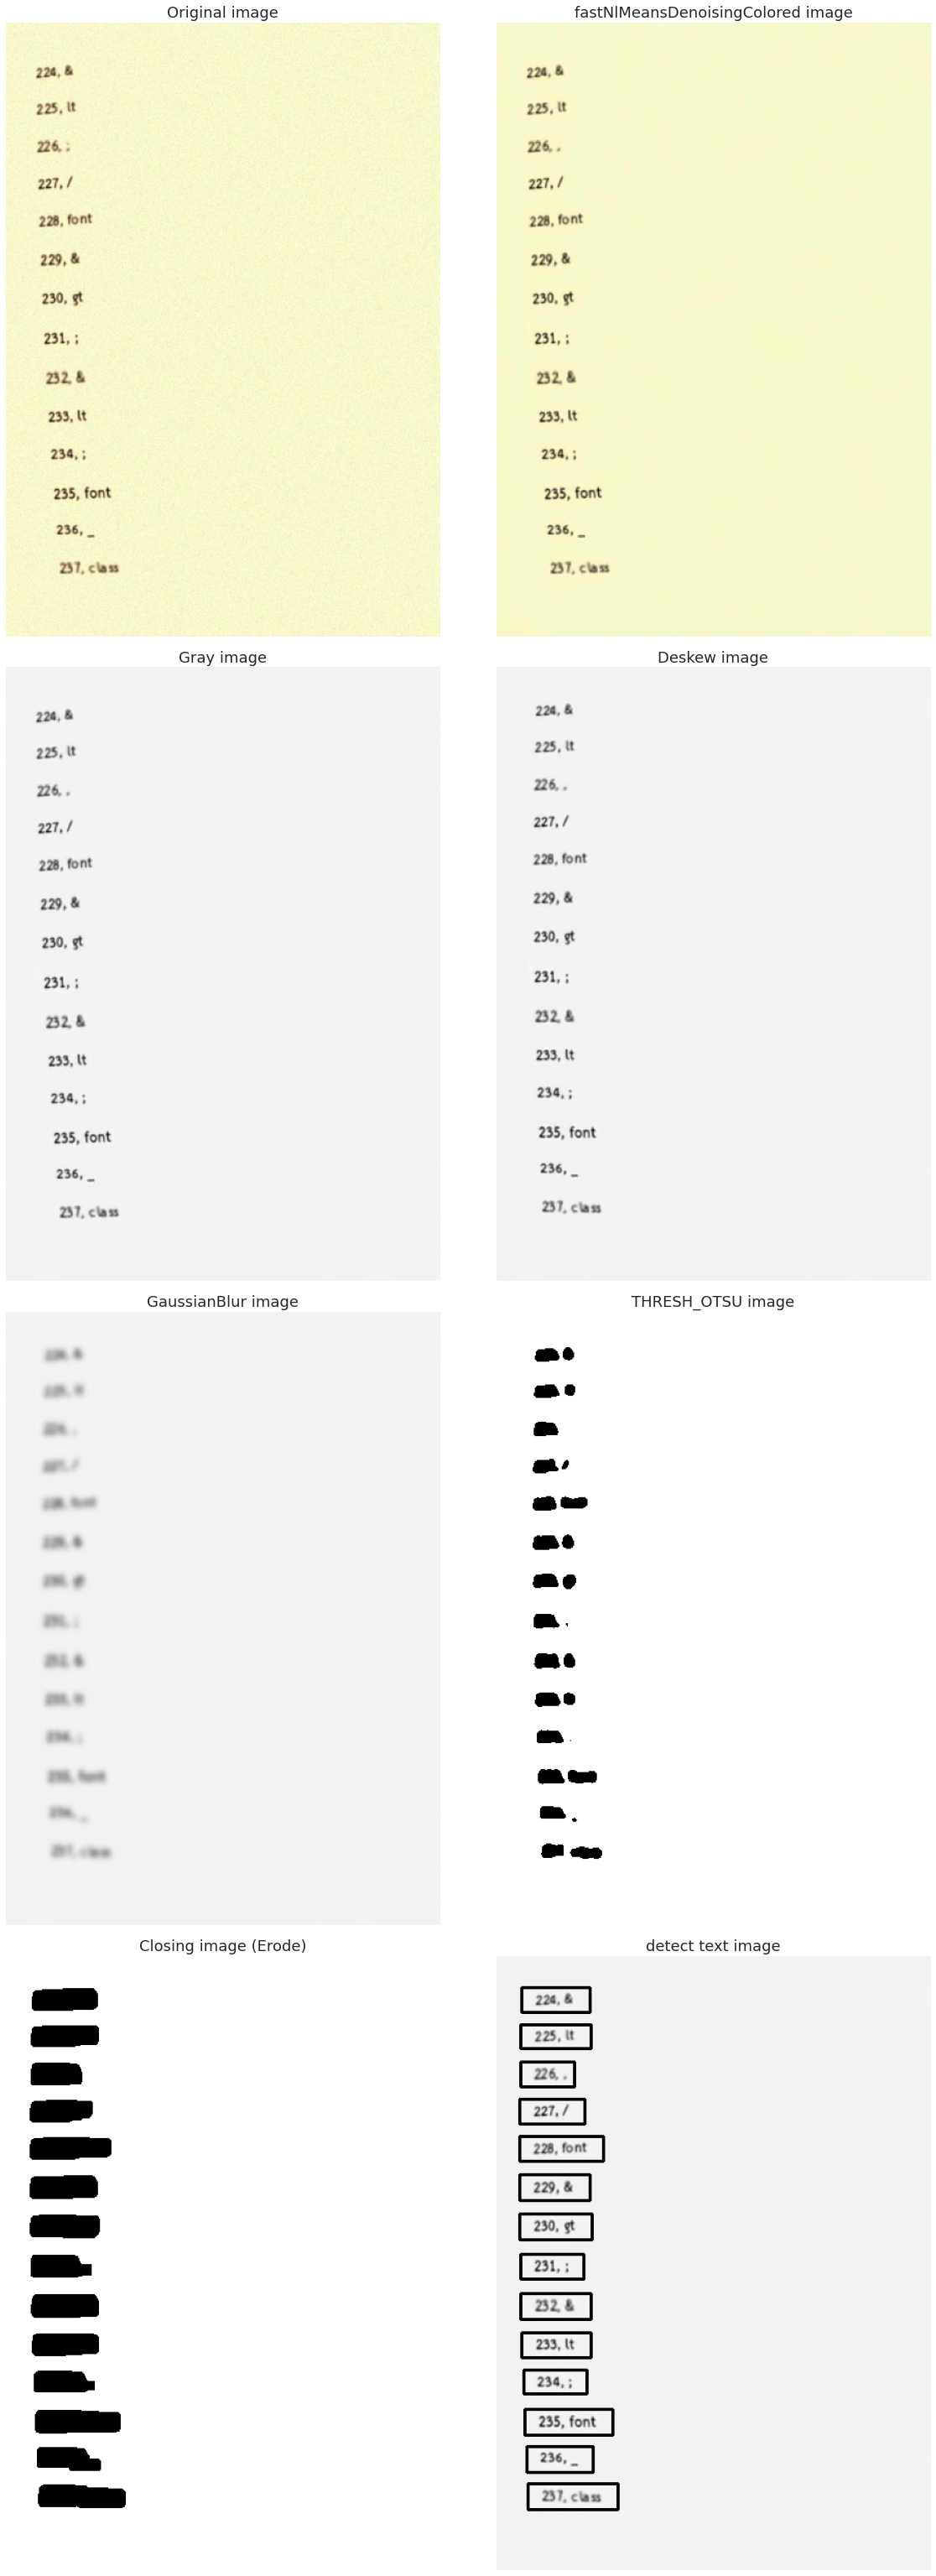

In [ ]:
local= '/content/images/images/00016.jpg'
imgresize = cv2.imread(local)
#remove noise
dst = cv2.fastNlMeansDenoisingColored(imgresize, None, 5, 5, 7, 21) 
# Grayscale
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

deskew_ = deskew(gray)
imgresize2 = deskew_.copy()
gray_blur = cv2.GaussianBlur(deskew_,(15,15),0)
thresh=cv2.threshold(gray_blur, 180, 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)[1]
kernel=np.ones((5,14),np.uint8)
closing = cv2.erode(thresh,kernel,iterations = 2)
result_img=closing.copy()

contours,hierachy=cv2.findContours(result_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
w,h= result_img.shape
print(len(contours))

kernel_sharp = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]],dtype=np.float32)

plt.figure(figsize=(20, 2))

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    
    if i != len(contours)-1:
        ax = plt.subplot(2,8,i+1)
        (x,y,w,h)= cv2.boundingRect(cnt)
        result = imgresize2[y:y+h,x:x+w]
        result = cv2.filter2D(result,-1,kernel_sharp)
        
        #forplot 
        result=cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
        ax.imshow(result)
        ax.axis('off')

        cv2.rectangle(imgresize2,(x,y),(x+w,y+h),(0,0,255),2)

        # cv2.imshow("show",result) 
        # cv2.waitKey(0)
ax.text(-120,-40, 'Kernel_sharp image',fontsize=18 )      


plt.figure(figsize=(20, 70))
ax1 = plt.subplot(5,2,1)
imgresize=cv2.cvtColor(imgresize, cv2.COLOR_BGR2RGB)
ax1.imshow(imgresize)
ax1.axis('off')
plt.title("Original image",fontsize=18)


ax2 = plt.subplot(5,2,2)
dst =cv2.cvtColor(dst , cv2.COLOR_BGR2RGB)
ax2.imshow(dst)
ax2.axis('off')
plt.title("fastNlMeansDenoisingColored image",fontsize=18)

ax3 = plt.subplot(5,2,3)
gray=cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
ax3.imshow(gray)
ax3.axis('off')
plt.title("Gray image",fontsize=18)

ax4 = plt.subplot(5,2,4)
deskew_=cv2.cvtColor(deskew_, cv2.COLOR_BGR2RGB)
ax4.imshow(deskew_)
ax4.axis('off')
plt.title("Deskew image",fontsize=18)


ax5 = plt.subplot(5,2,5)
gray_blur=cv2.cvtColor(gray_blur, cv2.COLOR_BGR2RGB)
ax5.imshow(gray_blur)
ax5.axis('off')
plt.title("GaussianBlur image",fontsize=18)

ax6 = plt.subplot(5,2,6)
thresh=cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
ax6.imshow(thresh)
ax6.axis('off')
plt.title("THRESH_OTSU image",fontsize=18)


ax7 = plt.subplot(5,2,7)
closing=cv2.cvtColor(closing, cv2.COLOR_BGR2RGB)
ax7.imshow(closing)
ax7.axis('off')
plt.title("Closing image (Erode)",fontsize=18)

ax8 = plt.subplot(5,2,8)
imgresize2=cv2.cvtColor(imgresize2, cv2.COLOR_BGR2RGB)
ax8.imshow(imgresize2)
ax8.axis('off')
plt.title("detect text image",fontsize=18)

plt.subplots_adjust(wspace=0.10, hspace=0.05)



plt.show()


### Cut image (Auto)

In [ ]:
path_image_cut= '/content/images/image_cut2'
path_image = '/content/images/images'
try: shutil.rmtree(path_image_cut)
except : pass
#Create Folder
os.mkdir(path_image_cut)


kernel_sharp = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]],dtype=np.float32)

num=0
for index in tqdm(range(len(os.listdir(path_image)))): 
    imgresize = cv2.imread(path_image+'/'+os.listdir(path_image)[index])
    #remove noise
    dst = cv2.fastNlMeansDenoisingColored(imgresize, None, 5, 5, 7, 21) 
    # Grayscale
    gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    deskew_ = deskew(gray)
    imgresize2 = deskew_
    gray_blur = cv2.GaussianBlur(deskew_,(15,15),0)
    thresh=cv2.threshold(gray_blur, 180, 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)[1]
    kernel=np.ones((5,14),np.uint8)
    closing = cv2.erode(thresh,kernel,iterations = 2)
    result_img=closing.copy()

    contours,hierachy=cv2.findContours(result_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    w,h= result_img.shape
    # print(len(contours),index)
    num=14*(index+1)-1
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if i != len(contours)-1:
            (x,y,w,h)= cv2.boundingRect(cnt)
            result = imgresize2[y:y+h,x:x+w]
            result = cv2.filter2D(result,-1,kernel_sharp)
            cv2.imwrite(path_image_cut+'/{}.jpg'.format(num),result)
            num-=1
            

  0%|          | 0/1000 [00:00<?, ?it/s]

Create fuction to postprocess

In [ ]:
blacklist=['แวง','เฒู','มู','แวร','แว','ใ%ู','ง','อ%ู','อง','แวพ','ด','งฒู','เฒ่่','ไม','วก','ญ','0990','ม','1816','ว','ก',]
list_num = [str(x) for x in range(1000)]
def clean_data(txt,j):
    txt=txt.replace('\n','')
    txt=txt.replace('|','')
    
    if ","  in txt:
        txt=txt[txt.index(',')+1:]
    elif '.' in txt:
        txt=txt[txt.index('.')+1:]
    elif ' ' in txt :
        txt=txt[txt.index(' ')+1:]
    elif str(j) in txt :
        txt=txt[txt.index(str(j))+1:]

    txt=txt.replace(' ','')
    txt=txt.replace('-','')
    txt=txt.replace('๕','&')
    

    text=re.findall("[ก-๙]+", txt)
    num=re.findall("[0-9]+", txt)
    if (len(text) == len(num) != 0)  :
        txt=text[0] 
    elif len(text) ==0 and len(num) >0 :
        if str(j) not in txt :
            txt=num[0]
        else : txt= '_' 
    
    if len(txt)==1 and (txt not in list_num):
        txt="_"
    
    
    if txt in blacklist :
       txt='_' 
    return txt

'9158, เมือง\n\x0c'

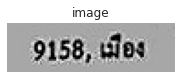

In [ ]:
#Test with one pic to image
j =1234

local = '/content/images/image_cut2/{}.jpg'.format(j)
img = cv2.imread(local)
plt.figure(figsize=(3, 1))
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title("image")

txt = pytesseract.image_to_string(local, lang='tha',config='--oem 3') # --psm 13 --psm 8
txt


In [ ]:
txt= clean_data(txt,j)
if txt =='' :
    txt = pytesseract.image_to_string(local, lang='tha',config='--oem 3 --psm 13')
    txt= clean_data(txt,j)
    if (txt =='') or ((txt) in list_num ) or ((txt[-1]) in list_num ) :
        txt ='_' 

elif txt[0] =='0' :
    txt ='_'     

print(txt)


เมือง


#Auto read by tesseract

In [ ]:
df_test = pd.DataFrame({"Id" : [], "Text" : []})
path_image_cut= 'image_cut2'
image_list = os.listdir(path_image_cut)
print(len(image_list))
for i in range(0,14000,1):
    local = path_image_cut+'/{}.jpg'.format(i)
    txt = pytesseract.image_to_string(local, lang='tha',config='--oem 3 ')
    txt= clean_data(txt,i)
    if txt =='' :
        txt = pytesseract.image_to_string(local, lang='tha',config='--oem 3 --psm 13')
        txt= clean_data(txt,j)
        if (txt =='') or ((txt) in list_num ) or ((txt[-1]) in list_num ) :
            txt ='_' 
    elif txt[0] =='0' :
        txt ='_'    
    
    df_test=df_test.append({"Id" : i, "Text" : txt}, ignore_index=True)

In [ ]:
df_test.to_csv('df_test_new.csv',index=False)

## **NER BERT Transformer**

Import library

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from google.colab import widgets
from transformers import pipeline
from datasets import load_dataset

import numpy as np
import pandas as pd
from pythainlp.tokenize import word_tokenize
from simpletransformers.ner import NERModel, NERArgs
import sklearn





### simpletransformers

In [ ]:
name = "xlm-roberta-large" #@param ["monsoon-nlp/bert-base-thai", "airesearch/wangchanberta-base-att-spm-uncased", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "Twitter/twhin-bert-base", "xlm-roberta-large"]
type_name = "auto" #@param ["bert", "camembert", "xlmroberta", "deberta",'auto']

In [ ]:
!cp /content/drive/MyDrive/Colab_Notebooks/Hackaton/4_NLP/best_model.zip /content/

In [ ]:
!unzip /content/best_model.zip

Archive:  /content/best_model.zip
   creating: best_model/
  inflating: best_model/config.json  
  inflating: best_model/model_args.json  
  inflating: best_model/optimizer.pt  
  inflating: best_model/pytorch_model.bin  
  inflating: best_model/scheduler.pt  
  inflating: best_model/special_tokens_map.json  
  inflating: best_model/tokenizer.json  
  inflating: best_model/tokenizer_config.json  
  inflating: best_model/training_args.bin  


In [ ]:
ner_args = {
    'max_seq_length':512,
}


test_ner = NERModel(type_name,'/content/best_model',args=ner_args)



Test load model

In [ ]:
result, model_outputs = test_ner.predict(['นาง สุดารัตน์ _ เกยุราพันธ์ _ รมว.'])
result

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'นาง': 'B_TTL'},
  {'สุดารัตน์': 'B_PER'},
  {'_': 'I_PER'},
  {'เกยุราพันธ์': 'E_PER'},
  {'_': 'O'},
  {'รมว.': 'B_DES'}]]

In [ ]:

ne_test= pd.read_csv('df_test_new.csv')
ne_test

In [ ]:
result_predict =[]
k=-1
m=0
for i,j in enumerate(ne_test['Text']):
    if i == 0 :
        result_predict.append("43363 ")
        k+=1
        m=0
    else :
        mod = m % 150
        if (mod >= 120) and (mod < 150):
            if j =='_' :
                result_predict[k]=result_predict[k]+j   
                result_predict.append("")
                k+=1
                m=0
            elif mod ==149 :
                result_predict[k]=result_predict[k]+j   
                result_predict.append("")
                k+=1
                m=0
            else:
                result_predict[k]=result_predict[k]+j
                result_predict[k]=result_predict[k]+" "      
        else:
            result_predict[k]=result_predict[k]+j
            result_predict[k]=result_predict[k]+" "    
    m+=1 

In [ ]:
result_predict[-1]=result_predict[-1][:-1]

In [ ]:
def check_space(string):
    # counter
    count = 0
    # loop for search each index
    for i in range(0, len(string)):
        # Check each char
        # is blank or not
        if string[i] == " ":
            count += 1   
    return count

In [ ]:
count=0
for i,j in enumerate(result_predict):
#     print(check_space(j)+1)
    count+=check_space(j)+1
print('count = ',count)

In [ ]:
result, model_outputs = test_ner.predict(result_predict)
len(result[0])

In [ ]:
result_p=[]
for index,result_s in (enumerate(result)) :
    for num,i in (enumerate(result_s)) :
        result_p.append(list(i.values())[0])
len(result_p)

In [ ]:
df_final = pd.read_csv('/content/sample_submission.csv')
df_final


In [ ]:
df_final['Predicted']=result_p
df_final
  

In [ ]:
NER_TAGS = {
        "O"     :  18   ,
        "B_BRN" :   8   ,
        "B_DES" :  12   ,
        "B_DTM" :   0   ,
        "B_LOC" :   2   ,   
        "B_MEA" :   4   ,
        "B_NUM" :   6   ,
        "B_ORG" :   10  ,
        "B_PER" :   12  ,
        "B_TRM" :   18  ,
        "B_TTL" :   12  ,
        "I_BRN" :   9   ,
        "I_DES" :   13  ,
        "I_DTM" :   1   ,
        "I_LOC" :   3   ,  
        "I_MEA" :   5   ,
        "I_NUM" :   7   ,
        "I_ORG" :   11  ,
        "I_PER" :  13   ,
        "I_TRM" :  18   ,
        "I_TTL" :  13   ,
        "E_BRN" :   9   ,
        "E_DES" :   13  ,
        "E_DTM" :   1   ,
        "E_LOC" :   3   ,  
        "E_MEA" :   5   ,
        "E_NUM" :   7   ,
        "E_ORG" :   11  ,
        "E_PER" :   13  ,
        "E_TRM" :   18  ,  
}

In [ ]:
df_final['Predicted']=df_final['Predicted'].replace(NER_TAGS)

In [ ]:
df_final.to_csv('/content/drive/MyDrive/Colab_Notebooks/Hackaton/4_NLP/submit/tw-large_4.csv',index=False)